In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt



In [14]:
df = pd.read_csv("./Loans_Dataset.csv")




In [15]:

le = LabelEncoder()
df['result_encoded'] = le.fit_transform(df['result'])  # yes -> 1, no -> 0
print(df[['result', 'result_encoded']].head(), "\n")



  result  result_encoded
0    yes               1
1    yes               1
2    yes               1
3    yes               1
4    yes               1 



In [16]:

X = df.drop(columns=['result', 'result_encoded'])
y = df['result_encoded']
print("Features preview:\n", X.head(), "\n")
print("Target preview:\n", y.head(), "\n")


Features preview:
    initial_payment  last_payment  credit_score  house_number    sum
0              201         10018           250          3046  13515
1              205         10016           395          3044  13660
2              257         10129           109          3251  13746
3              246         10064           324          3137  13771
4              117         10115           496          3094  13822 

Target preview:
 0    1
1    1
2    1
3    1
4    1
Name: result_encoded, dtype: int64 



In [17]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape, "\n")


Training set size: (803, 5)
Test set size: (201, 5) 



In [10]:

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [18]:

y_pred = clf.predict(X_test)
print("Sample predictions:", y_pred[:10], "\n")



Sample predictions: [0 0 0 0 1 0 0 0 1 1] 



In [12]:


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.9950248756218906
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       107
           1       0.99      1.00      0.99        94

    accuracy                           1.00       201
   macro avg       0.99      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201

Confusion Matrix:
 [[106   1]
 [  0  94]]


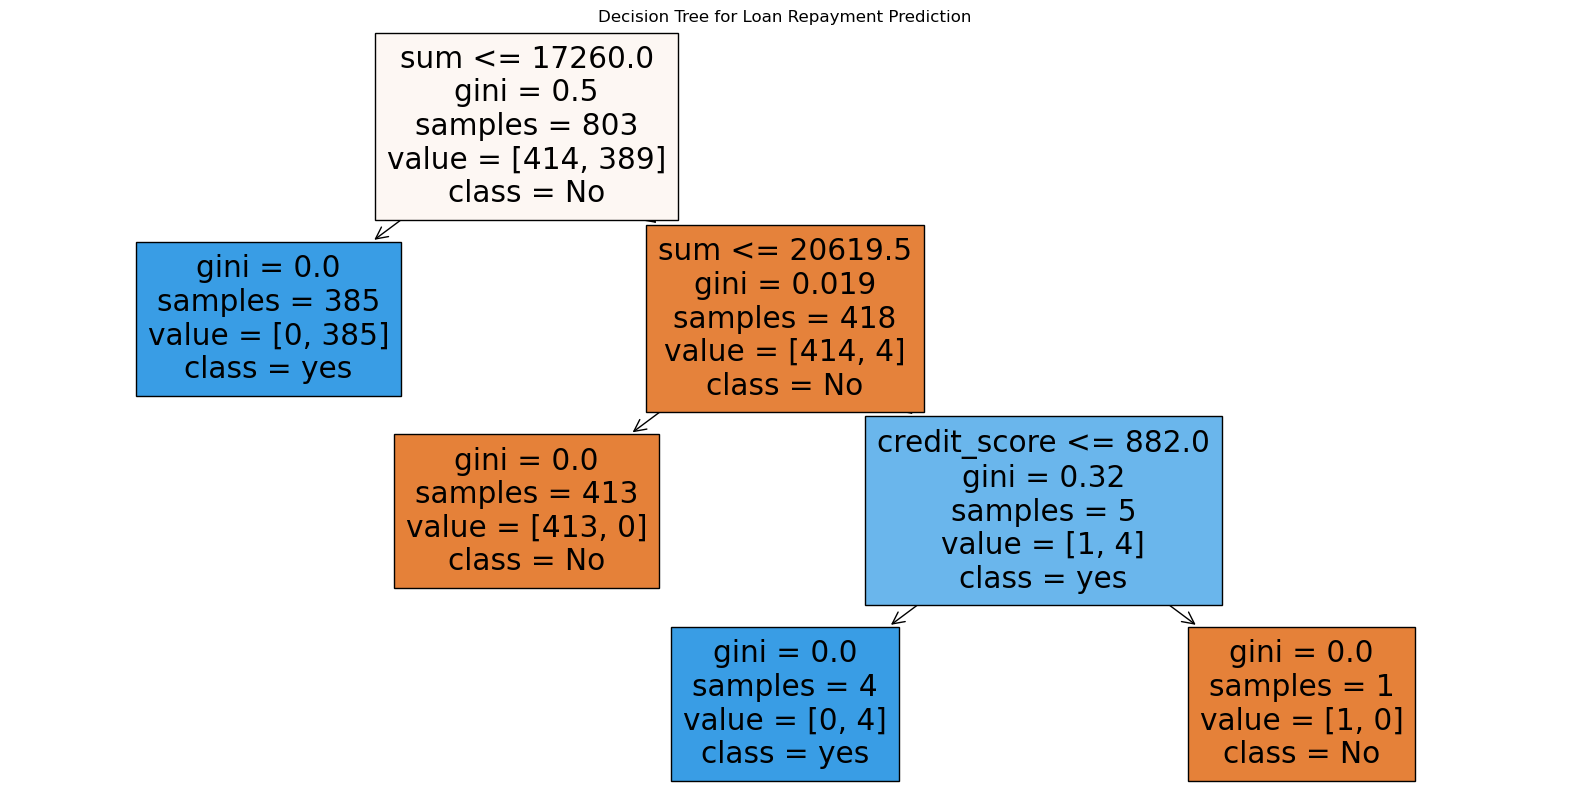

In [22]:
plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    feature_names=list(X.columns),  
    class_names=list(le.classes_.astype(str)),  
    filled=True
)
plt.title("Decision Tree for Loan Repayment Prediction")
plt.show()

